## Mid - Term
- Deva Kishore
- Wihar Paladugula

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv("https://github.com/msaricaumbc/DS_data/blob/master/ds602/dataset_newsletter.csv?raw=true")

In [3]:
df.head(5)

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           19597 non-null  object
 1   body            19604 non-null  object
 2   signature       19207 non-null  object
 3   submissiontime  19607 non-null  object
 4   category        19607 non-null  object
dtypes: object(5)
memory usage: 766.0+ KB


From above we can see that there are some nulls in the data hence replacing nulls with some meaning data

In [7]:
df['title'].fillna('Missing Title', inplace=True)

In [8]:
df['signature'].fillna('Missing Title', inplace=True)
df['body'].fillna('Missing Body', inplace=True)

In [9]:
df[df['body'] == 'Missing Body']

,title,body,signature,submissiontime,category
288,Volunteer,Missing Body,CMIT South PTO,1/7/16 10:48 AM,ANNOUNCEMENTS
5586,Missing Title,Missing Body,Angie Obrien Principal's Secretary,11/7/17 8:28 AM,BREAKING NEWS
14598,Missing Title,Missing Body,Dr. Fryson,1/27/21 10:48 AM,ANNOUNCEMENTS


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           19607 non-null  object
 1   body            19607 non-null  object
 2   signature       19607 non-null  object
 3   submissiontime  19607 non-null  object
 4   category        19607 non-null  object
dtypes: object(5)
memory usage: 766.0+ KB


From above we can see there are no null values anymore

Also we can observe Datatype of Submission Time is object hence changing it to date time

In [11]:
df['submissiontime'] = pd.to_datetime(df['submissiontime'])

In [12]:
df[['title', 'body', 'signature','category']] = df[['title', 'body', 'signature','category']].astype('string')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           19607 non-null  string        
 1   body            19607 non-null  string        
 2   signature       19607 non-null  string        
 3   submissiontime  19607 non-null  datetime64[ns]
 4   category        19607 non-null  string        
dtypes: datetime64[ns](1), string(4)
memory usage: 766.0 KB


In [14]:
df.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS


In [15]:
df.category.nunique()

12

In [16]:
df.category.unique()

<StringArray>
[    'ANNOUNCEMENTS',   'UPCOMING EVENTS',     'BREAKING NEWS',
       'FIELD TRIPS',               'PTO', 'VOLUNTEERS NEEDED',
  'DONATIONS NEEDED',         'ATHLETICS',    'IMPORTANT NEWS',
      'ACHIEVEMENTS',  'STUDENT THOUGHTS',             'CLUBS']
Length: 12, dtype: string

<Axes: >

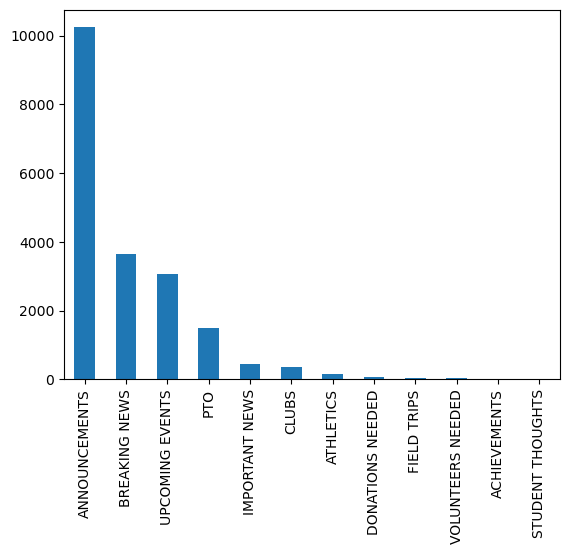

In [17]:
value_counts = df['category'].value_counts()

# Create bar plot
value_counts.plot(kind='bar')

### Test/split

In [18]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'category']

X = df[features]
y = df['category']

In [19]:
X

,title,body,signature,submissiontime
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00
...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,2023-01-11 10:28:00
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,2023-01-13 09:43:00
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,2023-01-13 09:49:00
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,2023-01-15 20:29:00


In [20]:
y

0        ANNOUNCEMENTS
1        ANNOUNCEMENTS
2        ANNOUNCEMENTS
3        ANNOUNCEMENTS
4        ANNOUNCEMENTS
             ...      
19602    ANNOUNCEMENTS
19603    ANNOUNCEMENTS
19604            CLUBS
19605            CLUBS
19606            CLUBS
Name: category, Length: 19607, dtype: string

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')

Records in training data: 15,685
Records in test data: 3,922


In [22]:
X_train

,title,body,signature,submissiontime
14046,HS SGA - Thanksgiving Challenge,Hi CMIT-South Families! SGA wants to engage ou...,Mr. Wassam (nwassam@cmitsouth.org) and Executi...,2020-11-19 08:09:00
2851,Parent Appreciation,"Dear Parents past and present, Thank you for ...",Donna McCallister,2016-11-15 13:07:00
3958,Repeat Free School,CSP continues to provide a rigorous and qual...,Darryl Gonzalez,2017-03-09 10:33:00
7118,Thank You! Thank You! Thank You!,Hello CSP family!!! This has been a great ye...,"Sincerely, Your CSP- PTSO Team",2018-06-01 10:16:00
18923,NHS Tutoring is Starting!,The National Honor Society will begin our Tuto...,Dr. Gaudette (ngaudette@cmitacademy.org) Profe...,2022-09-22 09:55:00
...,...,...,...,...
681,2015-2016 Annual Middle School Math Contest,Congratulations to the following students for ...,Mrs. Valencia Math/Technology Department Chair,2016-03-04 10:34:00
9154,Senior Class - Cap/Gown and Announcement Orders,"Parents of 12th grade students, Please rememb...",Angie O'Brien,2019-01-31 07:45:00
14353,Have a Safe and Fun Filled Break,This time of year is usually marked by the joi...,"James Screven, Assistant Principal",2020-12-20 00:18:00
4764,School Supply List,School supply list for the 2017-18 school ye...,CMIT SOUTH,2017-06-15 09:09:00


In [23]:
X_test

,title,body,signature,submissiontime
10723,Back to School Night,CMIT Families: The high school will host its ...,HS Administration,2019-09-07 10:24:00
469,Please no food or drinks,This is a friendly reminder that there is no f...,"Thank you, Srta. Stacie Young",2016-02-03 13:12:00
13647,Social Studies 8,"Hello. This upcoming week, we will be practic...",Janette Morandin,2020-10-15 11:14:00
3016,"PGCPS #FatherhoodForum - ""Father Daughter Dance""!","Greetings all, MarkYourCalendar!!! (Just a...",PGCPS,2016-12-02 10:30:00
5782,Fall Sports Banquet,"High School Parents, There will be a fall s...",Angie Obrien Principal's Secretary,2017-12-01 09:15:00
...,...,...,...,...
14579,Science Olympiad - Social Media Accounts - UMD...,Science Olympiad Team will participate in the ...,*****,2021-01-23 17:40:00
4214,Teachers Appreciation Week,May 1st-5th -- Teachers Appreciation Week &qu...,Missing Title,2017-03-31 21:41:00
8863,CLASS OF 2020 NEWS! SIGN UP FOR THE NEWSLETTE...,...,lhw,2019-01-04 14:31:00
6741,Join the HPLC Engineering Team at the Science ...,The HPLC Engineering Team consisting of Hann...,"H.P.L.C. Robotic Team and Alma Smith, Chemist...",2018-03-31 20:59:00


In [24]:
# categorical_vars=[i for i in df.columns if df[i].dtype == 'object' and i!='category']
# numerical_vars=[i for i in df.columns if df[i].dtype != 'object']

In [25]:
categorical_vars=['title', 'body', 'signature']
numerical_vars=['submissiontime']

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [28]:
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])

In [29]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                                      ('create_dummies', cat_pipeline, categorical_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['submissiontime']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['title', 'body', 'signature'])])


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'body',
                                                   'signature'])])),
                ('lm', LinearRegression())])

In [32]:
y_predict_train = modeling_pipeline.predict(X_train)

In [33]:
y_predict_test = modeling_pipeline.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

train_rmse = mean_absolute_error(y_train, y_predict_train)
test_rmse = mean_absolute_error(y_test, y_predict_test)

In [35]:
train_mse,test_mse

(0.39695042060045865, 6.640497104023636)

In [36]:
train_rmse,test_rmse

(0.10354224213612877, 1.6548434306068083)

As test MSE is pretty high we can say model is performing better on the training data compared to the test data hence it is overfitting 

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None))]
    )
log_modeling_pipeline.fit(X_train, y_train)

C:\Users\Wihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'body',
                                                   'signature'])])),
                ('logreg', LogisticRegression(penalty=None))])

In [38]:
y_predict_train = log_modeling_pipeline.predict(X_train)
y_predict_test = log_modeling_pipeline.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)

print("Training accuracy is", train_accuracy)
print("Test accuracy is", test_accuracy)

Training accuracy is 0.9864839018170226
Test accuracy is 0.7417134115247322


### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)
dt_modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'body',
                                                   'signature'])])),
                ('dt', DecisionTreeClassifier())])

In [41]:
y_predict_train = dt_modeling_pipeline.predict(X_train)
y_predict_test = dt_modeling_pipeline.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)

print("Training accuracy is", train_accuracy)
print("Test accuracy is", test_accuracy)

Training accuracy is 0.9963659547338222
Test accuracy is 0.7457929627740949


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'body',
                                                   'signature'])])),
                ('rf', RandomForestClassifier())])

In [44]:
y_predict_train = rf_pipeline.predict(X_train)
y_predict_test = rf_pipeline.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)

print("Training accuracy is", train_accuracy)
print("Test accuracy is", test_accuracy)

Training accuracy is 0.9961109340133886
Test accuracy is 0.7498725140234574


### SVM

In [46]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
('data_processing', processing_pipeline),
('svm', SVC())
])
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'body',
                                                   'signature'])])),
                ('svm', SVC())])

In [47]:
y_predict_train = svm_pipeline.predict(X_train)
y_predict_test = svm_pipeline.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)

print("Training accuracy is", train_accuracy)
print("Test accuracy is", test_accuracy)

Training accuracy is 0.9127829136117309
Test accuracy is 0.7266700662927078


### Cross Validation

In [49]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_validate
pipelines = [log_modeling_pipeline, dt_modeling_pipeline, rf_pipeline,svm_pipeline]
scoring = ['accuracy', 'recall', 'precision_macro','f1_macro', 'roc_auc']
for clf in pipelines:
    cv_results = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)
#     print(cv_results)
    [print(key,':',value) for key, value in cv_results.items()]
    print()

fit_time : [10.45797539 10.6728394  10.50367689 10.49815536 10.46541619]
score_time : [0.20346165 0.19269967 0.19624138 0.19413519 0.19333768]
test_accuracy : [0.73669111 0.72744661 0.7261715  0.70927638 0.72521517]
test_recall : [nan nan nan nan nan]
test_precision_macro : [0.58512301 0.58660448 0.56774699 0.66795542 0.67034117]
test_f1_macro : [0.48875124 0.47077315 0.44942816 0.52990658 0.52812665]
test_roc_auc : [nan nan nan nan nan]

fit_time : [12.4412384  13.95402098 16.08487964 13.77493334 15.31359291]
score_time : [0.16347313 0.19362068 0.16313577 0.17146945 0.16648197]
test_accuracy : [0.72138986 0.71756455 0.71628945 0.71246414 0.70927638]
test_recall : [nan nan nan nan nan]
test_precision_macro : [0.50449933 0.54831638 0.58356489 0.61267052 0.64797145]
test_f1_macro : [0.44819845 0.4816168  0.4358932  0.52182024 0.54704562]
test_roc_auc : [nan nan nan nan nan]

fit_time : [277.32096434 279.5584836  271.28338146 278.14217496 278.57972574]
score_time : [1.75184584 1.73368716 

- For logistic regression, the test_accuracy score ranges from 0.726 to 0.736, with an average of 0.725. The test_precision_macro score ranges from 0.567 to 0.671, with an average of 0.599. The test_roc_auc score is not available because the multiclass target variable is not supported.

- For decision tree, the test_accuracy score ranges from 0.711 to 0.718, with an average of 0.714. The test_precision_macro score ranges from 0.521 to 0.638, with an average of 0.576. The test_roc_auc score is not available because the multiclass target variable is not supported.

- For random forest, the test_accuracy score ranges from 0.720 to 0.729, with an average of 0.725. The test_precision_macro score ranges from 0.495 to 0.720, with an average of 0.622. The test_roc_auc score is not available because the multiclass target variable is not supported.

### Hyper Parameter Tuning- GridSearch

In [50]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
hyperparameters = {
    'logreg__C': [0.1, 1, 10], # regularization strength
    'logreg__penalty': ['l1', 'l2'], # regularization type
    'logreg__solver': ['newton-cg', 'lbfgs','liblinear']
}

log_modeling_pipeline_tuned = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression())
])


grid_search = GridSearchCV(log_modeling_pipeline_tuned, hyperparameters, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best hyperparameters:  {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best cross-validation score:  0.7279566464775262


[Hyperparameters in Logistic Regression](https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'dt__max_depth': [5, 10, 20], # maximum depth of decision tree
    'dt__min_samples_leaf': [1, 5, 10] # minimum number of samples required to be at a leaf node
}

dt_modeling_pipeline_tuned = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])


grid_search = GridSearchCV(dt_modeling_pipeline_tuned, hyperparameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'dt__max_depth': 20, 'dt__min_samples_leaf': 1}
Best cross-validation score:  0.5938795027095952


- the cross-validation score is relatively low, indicating that the model may not peredict well to new data.

[Hyperparameters in Decision Tree Clasifier](https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf)

In [52]:
from sklearn.ensemble import RandomForestClassifier

hyperparameters = {
'rf__n_estimators': [15, 25, 50], # number of trees
'rf__max_depth': [2, 5, 8], # maximum depth of tree
'rf__min_samples_split': [2, 5, 10], # minimum number of samples required to split an internal node
'rf__min_samples_leaf': [1, 2, 4] # minimum number of samples required to be at a leaf node
}

rf_modeling_pipeline_tuned = Pipeline([
('data_processing', processing_pipeline),
('rf', RandomForestClassifier())
])

grid_search = GridSearchCV(rf_modeling_pipeline_tuned, hyperparameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'rf__max_depth': 5, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 15}
Best cross-validation score:  0.5215811284666879


- the cross-validation score is relatively low, indicating that the model may not peredict well to new data.

[Hyperparameters in Random Forest Clasifier](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [ ]:
from sklearn.svm import SVC

hyperparameters = {
'svm__C': [0.1, 1, 10], # regularization strength
'svm__kernel': ['linear', 'rbf', 'poly'] # kernel function for SVM  radial basis function,polynomial
}

svm_modeling_pipeline_tuned = Pipeline([
('data_processing', processing_pipeline),
('svm', SVC())
])

grid_search = GridSearchCV(svm_modeling_pipeline_tuned, hyperparameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

- The best hyperparameters are a regularization parameter C of 1 and a linear kernel.
- Among Logistic, Decision Tree, RandomForest. RandomForest has the best cross-validation score.

[Hyperparameters in Support Vector Classifier](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)

## Summary